In [2]:
import pandas as pd
customer=pd.read_csv('customer_join.csv')
uselog_months=pd.read_csv('use_log_months.csv')
uselog_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [3]:
year_months=list(uselog_months['年月'].unique())
uselog = pd.DataFrame()
for i in range(1,len(year_months)):
    tmp=uselog_months.loc[uselog_months['年月']==year_months[i]].copy()
    tmp.rename(columns={'count':'count_0'},inplace=True)
    tmp_before=uselog_months.loc[uselog_months['年月']==year_months[i-1]].copy()
    del tmp_before['年月']
    tmp_before.rename(columns={'count':'count_1'},inplace=True)
    tmp = pd.merge(tmp,tmp_before,on='customer_id',how='left')
    uselog=pd.concat([uselog,tmp],ignore_index=True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [4]:
from dateutil.relativedelta import relativedelta
exit_customer=customer.loc[customer['is_deleted']==1].copy()
exit_customer['exit_date']=None
exit_customer['end_date']=pd.to_datetime(exit_customer['end_date'])
exit_customer['exit_date'] = exit_customer['end_date'] - pd.DateOffset(months=1)
exit_customer['exit_date']=pd.to_datetime(exit_customer['exit_date'])
exit_customer['年月']=exit_customer['exit_date'].dt.strftime('%Y%m')
uselog['年月']=uselog['年月'].astype(str)
exit_uselog=pd.merge(uselog,exit_customer,on=['customer_id','年月'],how='left')
print(len(uselog))
exit_uselog

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [5]:
exit_uselog=exit_uselog.dropna(subset=['name'])
print(len(exit_uselog))
print(len(exit_uselog['customer_id'].unique()))
exit_uselog

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,6000.0,通常,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28
30787,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6000.0,入会費無料,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28
30827,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,7500.0,入会費無料,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28
30842,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,7500.0,通常,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28


In [6]:
conti_customer=customer.loc[customer['is_deleted']==0]
conti_uselog=pd.merge(uselog,conti_customer,on=['customer_id'],how='left')
print(len(conti_uselog))
conti_uselog=conti_uselog.dropna(subset='name')
print(len(conti_uselog))

33851
27422


In [7]:
conti_uselog=conti_uselog.sample(frac=1,random_state=0).reset_index(drop=True)
conti_uselog=conti_uselog.drop_duplicates(subset='customer_id')
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaN,CA1,...,オールタイム,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaN,CA1,...,オールタイム,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaN,CA1,...,ナイト,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaN,CA1,...,オールタイム,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0


In [8]:
predict_data=pd.concat([conti_uselog,exit_uselog],ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_5092/4164445289.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predict_data=pd.concat([conti_uselog,exit_uselog],ignore_index=True)


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT


In [9]:
predict_data['period']=0
predict_data['now_date']=pd.to_datetime(predict_data['年月'],format='%Y%m')
predict_data['start_date']=pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
    delta=relativedelta(predict_data.loc[i,'now_date'],predict_data.loc[i,'start_date'])
    predict_data.loc[i,'period']=int(delta.years*12+delta.months)
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT,8,2018-05-01


In [10]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [11]:
predict_data=predict_data.dropna(subset=['count_1'])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [12]:
target_col=['campaign_name','class_name','gender','count_1','routine_flg','period','is_deleted']
predict_data=predict_data[target_col]
predict_data

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,0,0.0
1,通常,オールタイム,M,5.0,1.0,9,0.0
2,通常,オールタイム,M,4.0,1.0,15,0.0
3,通常,ナイト,M,6.0,1.0,3,0.0
4,通常,オールタイム,M,7.0,1.0,8,0.0
...,...,...,...,...,...,...,...
3941,通常,ナイト,F,2.0,0.0,11,1.0
3942,入会費無料,ナイト,M,6.0,0.0,1,1.0
3943,入会費無料,デイタイム,F,3.0,0.0,1,1.0
3944,通常,デイタイム,F,3.0,1.0,11,1.0


In [13]:
predict_data=pd.get_dummies(predict_data)
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,True,False,False,True,False,False,False,True
1,5.0,1.0,9,0.0,False,False,True,True,False,False,False,True
2,4.0,1.0,15,0.0,False,False,True,True,False,False,False,True
3,6.0,1.0,3,0.0,False,False,True,False,False,True,False,True
4,7.0,1.0,8,0.0,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,False,False,True,False,False,True,True,False
3942,6.0,0.0,1,1.0,False,True,False,False,False,True,False,True
3943,3.0,0.0,1,1.0,False,True,False,False,True,False,True,False
3944,3.0,1.0,11,1.0,False,False,True,False,True,False,True,False


In [14]:
del predict_data['campaign_name_通常']
del predict_data['class_name_ナイト']
del predict_data['gender_F']
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_M
0,7.0,1.0,0,0.0,True,False,True,False,True
1,5.0,1.0,9,0.0,False,False,True,False,True
2,4.0,1.0,15,0.0,False,False,True,False,True
3,6.0,1.0,3,0.0,False,False,False,False,True
4,7.0,1.0,8,0.0,False,False,True,False,True


In [15]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit=predict_data.loc[predict_data['is_deleted']==1]
conti=predict_data.loc[predict_data['is_deleted']==0].sample(len(exit),random_state=0)

X=pd.concat([exit,conti],ignore_index=True)
y=X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y,random_state=0)

model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(y_test_pred)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.

In [16]:
results_test=pd.DataFrame({'y_test':y_test,'y_pred':y_test_pred})
results_test

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0
...,...,...
1029,1.0,1.0
553,1.0,1.0
1570,0.0,0.0
82,1.0,1.0


In [17]:
correct=len(results_test.loc[results_test['y_test']==results_test['y_pred']])
data_count=len(results_test)
print(correct/data_count)

0.8954372623574145


In [18]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.8954372623574145
0.9759188846641318


In [20]:
X = pd.concat([exit,conti],ignore_index=True)
y=X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y,random_state=0)

model=DecisionTreeClassifier(random_state=0,max_depth=5)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.9201520912547528
0.9252217997465145


In [21]:
importance=pd.DataFrame({"feature_names":X.columns,'coefficient':model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.363986
1,routine_flg,0.136646
2,period,0.487865
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.006751
5,class_name_オールタイム,0.004607
6,class_name_デイタイム,0.000146
7,gender_M,0.000000


[Text(0.5643939393939394, 0.9166666666666666, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792, 786]'),
 Text(0.26515151515151514, 0.75, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.12121212121212122, 0.5833333333333334, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.06060606060606061, 0.4166666666666667, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.25, 'count_1 <= 3.5\ngini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.06060606060606061, 0.08333333333333333, 'gini = 0.0\nsamples = 359\nvalue = [0, 359]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.043\nsamples = 136\nvalue = [3, 133]'),
 Text(0.18181818181818182, 0.4166666666666667, 'routine_flg <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.15151515151515152, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 

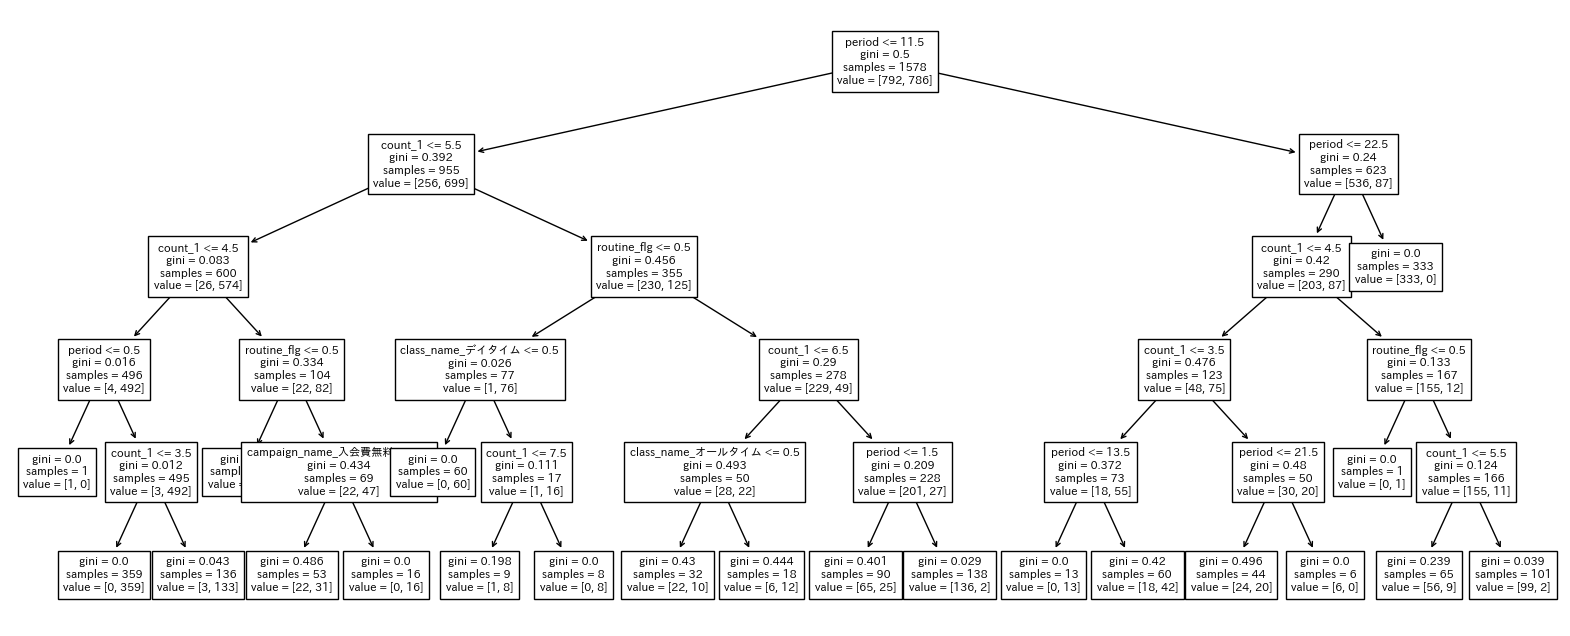

In [23]:
!pip install japanize_matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(model,feature_names=X.columns,fontsize=8)